In [4]:
import csv 

In [11]:
#read file
with open("citibike.csv","r") as fi:
    reader = csv.DictReader(fi)
    for row in reader:
        birthyear = row["birth_year"]
        if birthyear != "":
            age = 2015-int(birthyear)
            print(age)

37
22
46
30
58
36
32
60
30
33
27
24
33
25
38
47
25
28
35
55
29
28
46
58
34
22
40
42
42
38
34
24
35
44
31
20
21
47
22
49
31
43
25
34
51
61
31
33
36
29
28
29
23
26
28
24
28
26
35
31
34
25
45
43
42
27
26
45
22
20
54
49
40
41
33
31
40
31
24
31
43
27
35
42
32
26
39
25
36
30
32
45
30
29
54
54
28
31
30
25
25
23
56
36
35
54
23
28
44
50
26
33
46
45
39
49
61
24
30
42
38
54
40
32
27
32
37
29
22
27
37
42
55
25
57
41
39
54
30
42
32
34
22
49
32
26
42
48
26
27
51
30
27
34
39
33
32
25
30
35
30
30
50
24
48
22
39
45
20
29
47
39
25
38
27
23
61
26
30
32
35
34
31
30
31
28
38
33
21
31
32
40
27
25
43
52
35
33
28
30
49
50
28
45
31
31
25
33
39
30
44
58
31
36
51
56
52
44
66
33
57
47
26
35
40
43
32
34
47
32
33
26
35
55
35
43
60
28
51
31
50
40
32
37
48
40
39
26
38
22
22
41
41
45
40
61
60
41
44
57
56
47
51
58
63
40
20
30
40
54
38
35
31
23
28
46
39
34
45
55
31
37
30
35
33
38
45
28
29
23
34
41
28
44
39
61
56
57
24
45
40
56
55
31
63
23
28
34
44
52
32
57
70
67
30
47
23
33
40
37
45
38
31
54
25
41
32
29
45
34
31
49
35
3

In [12]:
#def generator to iterate teh daata set only once
def citibike2gen(filename):
    with open("citibike.csv","r") as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            birthyear = row["birth_year"]
            if birthyear != "":
                age = 2015-int(birthyear)
                yield age
count = {}
for age in citibike2gen("citibike.csv"):
    count[age] = count.get(age,0)+1

In [13]:
count

{37: 1377,
 22: 470,
 46: 1133,
 30: 1673,
 58: 449,
 36: 1279,
 32: 1793,
 60: 413,
 33: 1455,
 27: 1358,
 24: 922,
 25: 1361,
 38: 1122,
 47: 1010,
 28: 1730,
 35: 1509,
 55: 771,
 29: 1568,
 34: 1499,
 40: 1071,
 42: 1022,
 44: 1162,
 31: 1714,
 20: 256,
 21: 392,
 49: 863,
 43: 1081,
 51: 891,
 61: 417,
 23: 493,
 26: 1322,
 45: 1347,
 54: 618,
 41: 1158,
 39: 1168,
 56: 687,
 50: 947,
 57: 783,
 48: 999,
 52: 970,
 66: 134,
 63: 247,
 70: 28,
 67: 149,
 18: 94,
 19: 124,
 53: 899,
 65: 150,
 71: 59,
 62: 346,
 59: 488,
 64: 229,
 74: 39,
 77: 24,
 81: 8,
 68: 74,
 73: 61,
 75: 21,
 72: 18,
 69: 93,
 17: 59,
 115: 22,
 16: 17,
 80: 9,
 76: 4,
 105: 2,
 89: 1,
 86: 1,
 114: 1,
 93: 4}

In [14]:
import dateutil
with open("citibike.csv","r") as fi:
    reader = csv.DictReader(fi)
    for row in reader:
        starttime = dateutil.parser.parse(row["starttime"])
        if starttime != "":
            print(starttime)
            print(starttime.weekday(),starttime.hour)
            break

2015-02-01 00:00:00+00:00
6 0


In [15]:
#def generator to iterate teh data set only once
def citibike2gen(filename):
    with open("citibike.csv","r") as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            starttime = dateutil.parser.parse(row["starttime"])
            if starttime != "":
                yield starttime.hour
count = {}
for each_hour in citibike2gen("citibike.csv"):
    count[each_hour] = count.get(each_hour,0)+1

In [ ]:
count

In [16]:
import pandas as pd
data = {"size": count.keys(),"count":count.values()}
df = pd.DataFrame.from_dict(data,orient="index")
df=df.transpose()
df

,size,count
0,0,401
1,1,248
2,2,117
3,3,89
4,4,89
5,5,293
6,6,988
7,7,2037
8,8,3668
9,9,3108


/var/folders/4t/j0tpqxs11zz8x88ccnwr34rc0000gn/T/ipykernel_21442/2752313149.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "size",y="count",data = df, ci = None)


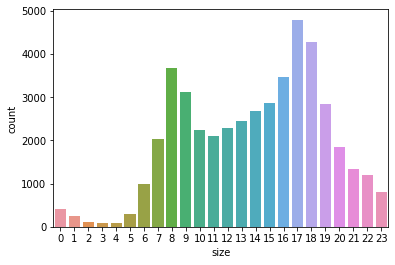

In [17]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x = "size",y="count",data = df, ci = None)

In [ ]:
#HW1 2.A

import pandas as pd
from functools import reduce
import math
import numpy as np

df = pd.read_csv("citibike.csv")
rows = df.values.tolist()

gender = map(lambda x:x[16],rows)
pairs = map(lambda x: (int(x==1),int(x==2)),gender)
print(list(pairs))
#reduce(lambda(x,y: x value [0] plus y value [0], x value 1 plus y value [1], list(pairs)))

In [ ]:
k1_v1 = [(,"MapReduce is a programming model and an associated implementation for processing and generating big data sets with a parallel, distributed algorithm on a cluster.[1][2][3]")
(,"A MapReduce program is composed of a map procedure, which performs filtering and sorting (such as sorting students by first name into queues, one queue for each name), and a reduce method, which performs a summary operation (such as counting the number of students in each queue, yielding name frequencies"). 
(,"The MapReduce System (also called infrastructure or framework) orchestrates the processing by marshalling the distributed servers, running the various tasks in parallel, managing all communications and data transfers between the various parts of the system, and providing for redundancy and fault tolerance.")
]

k2_v2 = [("MapReduce",1)
("is",1)
("a",1)
...
("MapReduce",1)
("programe",1)
("is",1)
...
...
..
("MapReduce",1)
...
...
...
]

k2_v2_shuffled = [("MapReduce",[1,1,1])
("is",[1,1])
("a",[1])
...
("programe",[1])
...
...
...
]

k3_v3 = [("MapReduce",3)
("is",3)
("a",1)
...
("programe",1)
...
...
...
]

In [1]:
from functools import reduce
reduce(lambda x,y:x+y,[1,1,1])

3

In [11]:

def k1v1_transform_k2v2(y):
    return(y[1],1)

k1v1 = [(1,"Hello"),(2,"World"),(3,"Hello"),(4,"Python")]
k2v2 = map(k1v1_transform_k2v2,k1v1)

print(list(k2v2))

[('Hello', 1), ('World', 1), ('Hello', 1), ('Python', 1)]


In [12]:
#python map/reduce != PySpark map/reduceByKey

[("Hello",2), ("World",1),("Python",1)]

[('Hello', 2), ('World', 1), ('Python', 1)]